In [106]:
### Content

# 1- Libraries
# 2- API
# 3- Download the Files
# 4- Read the Files
# 5- Data Manipulation
# 6- Exploratory Data Analysis
# 7- Data Preperation
# 8- Building Model-0

### 1- Libraries

In [107]:
# Data Manipulation and Cleaning Libraries
import pandas as pd  # For data manipulation and data frames
import numpy as np  # For numerical operations and arrays

# File and System Operations Libraries
import os  # For operating system interactions, like file handling
import zipfile  # For working with zip files

# Dataset Access Libraries
from kaggle.api.kaggle_api_extended import KaggleApi  # For accessing datasets from Kaggle
from config import *  # Importing custom configurations

# Data Visualization Libraries
import seaborn as sns  # For advanced data visualization
from matplotlib import pyplot as plt  # For plotting graphs and charts
import matplotlib  # For customizing matplotlib settings

# Machine Learning Libraries
from sklearn.preprocessing import LabelEncoder  # For converting categorical data to numerical

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score



### 2- API

In [87]:
# Kaggle API

api = KaggleApi()
api.authenticate()

competition = comp
api.competition_download_files(competition, path=path_1)


### 3- Download the Files

In [88]:
# Download the file
zip_file_path = os.path.join(path_1, 'playground-series-s4e1.zip')  # Burada dosya adını doğru şekilde belirtin

# Extract the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(path_1)

print(f"Zip Files Saved...")


Zip Files Saved...


### 4- Read the Files

In [89]:
# Raw data klasörünün yolu
raw_data_directory = path_1

In [90]:
# Klasörün içindeki dosyaları listeleme
if os.path.exists(path_1) and os.path.isdir(path_1):
    files = os.listdir(path_1)
    print("Files in the Raw Folder:")
    print(" ")
    for file in files:
        print(file)
else:
    print("Belirtilen klasör yok veya bir dizin değil.")

Files in the Raw Folder:
 
playground-series-s4e1.zip
sample_submission.csv
test.csv
train.csv


In [91]:
# Klasördeki dosyaları listele
files = os.listdir(path_1)

print("Dataframes: ")
print("")

# CSV dosyalarını oku ve değişken olarak kaydet
for csv_file in files:
    if csv_file.endswith('.csv'):
        file_path = os.path.join(path_1, csv_file)
        df = pd.read_csv(file_path)
        
        # Dosya adını kullanarak değişken adını belirle
        var_name = os.path.splitext(csv_file)[0] + '_df'
        
        # DataFrame'i globals() fonksiyonunu kullanarak kaydet
        globals()[var_name] = df

        print(f"{var_name} saved...")

Dataframes: 

sample_submission_df saved...
test_df saved...
train_df saved...


### 5- Data Manipulation

In [92]:
# Use train_df as main dataset

df = train_df.copy()

In [93]:
df.info()
df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.0,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.0,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.0,2,1.0,0.0,184866.69,0


### 6- Exploratory Data Analysis

In [112]:
# Statistical Distribution
df.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000,165034.000000
mean,656.454373,0.648545,0.564429,38.125888,5.020353,55478.086689,1.554455,0.753954,0.497770,112574.822734,0.211599
std,80.103340,0.816574,0.495833,8.867205,2.806159,62817.663278,0.547154,0.430707,0.499997,50292.865585,0.408443
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,597.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74637.570000,0.000000
50%,659.000000,0.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117948.000000,0.000000
75%,710.000000,1.000000,1.000000,42.000000,7.000000,119939.517500,2.000000,1.000000,1.000000,155152.467500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


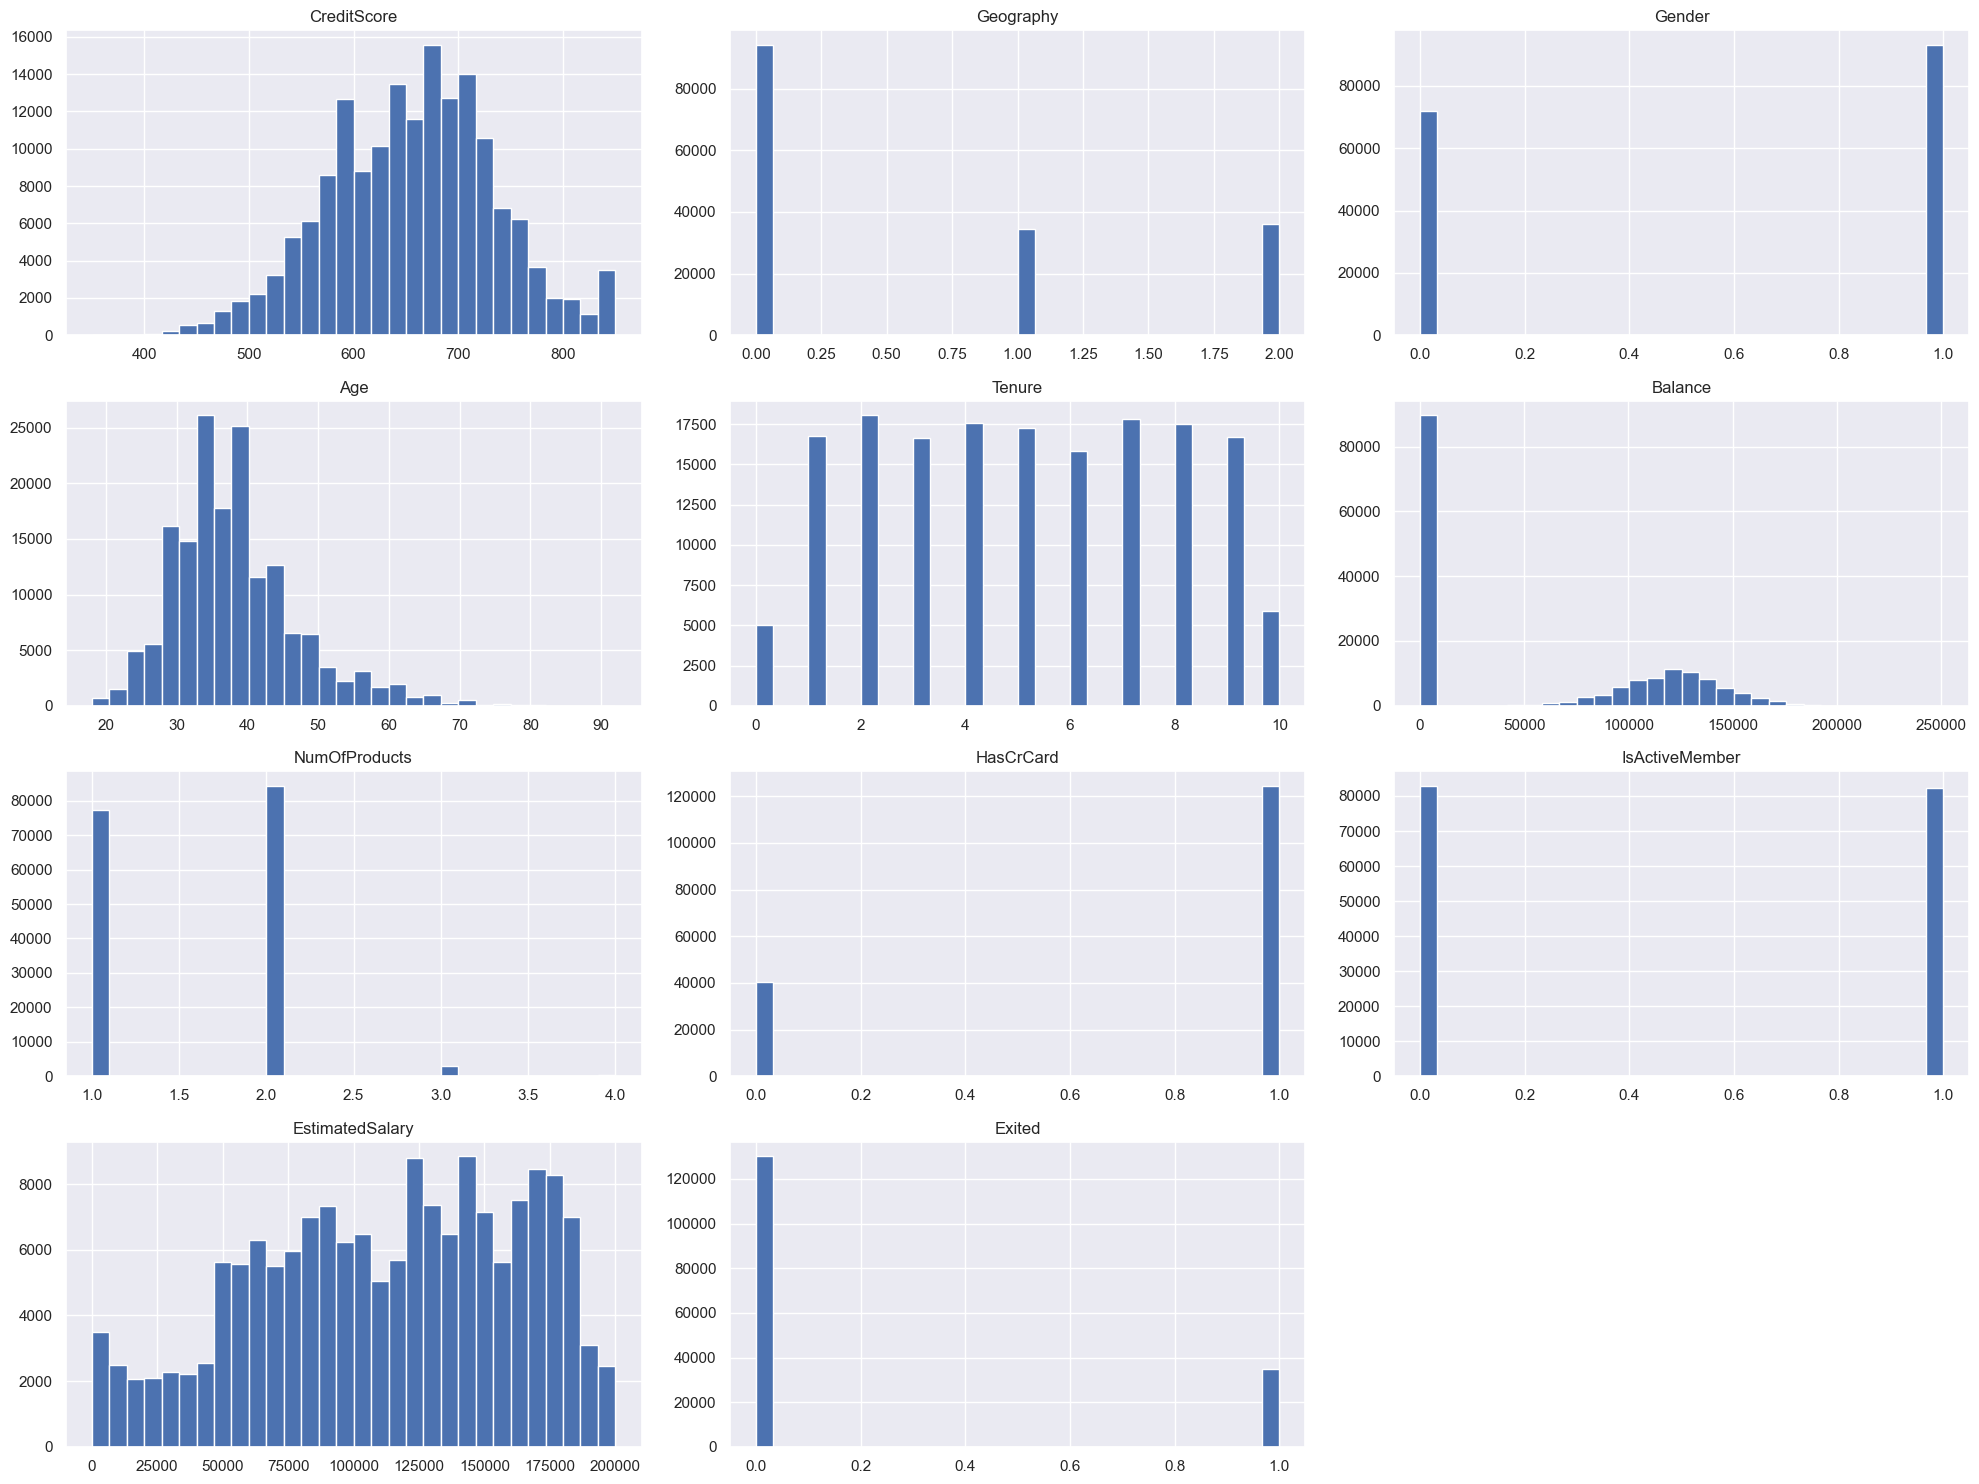

In [113]:
# Histograms
df.hist(bins=30, figsize=(20, 15))
plt.tight_layout()
plt.show()

C:\Users\ilyas\AppData\Local\Temp\ipykernel_26872\1787145518.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


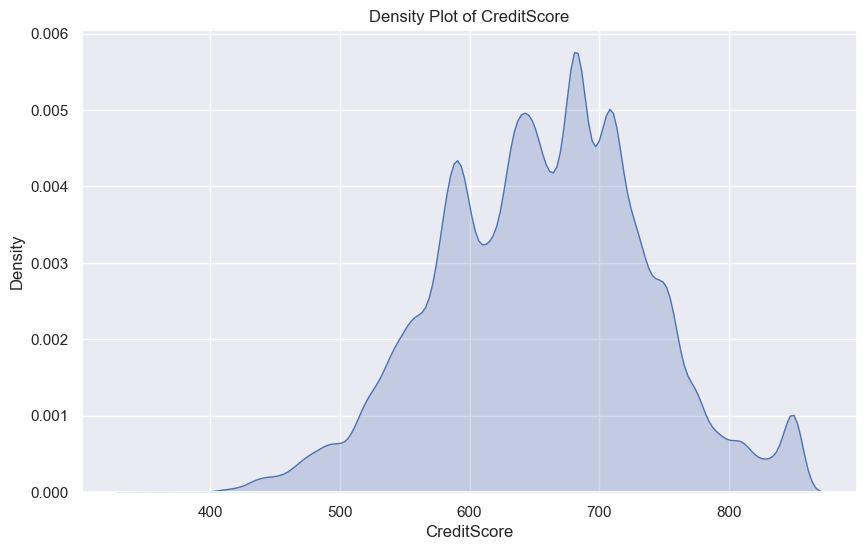

C:\Users\ilyas\AppData\Local\Temp\ipykernel_26872\1787145518.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


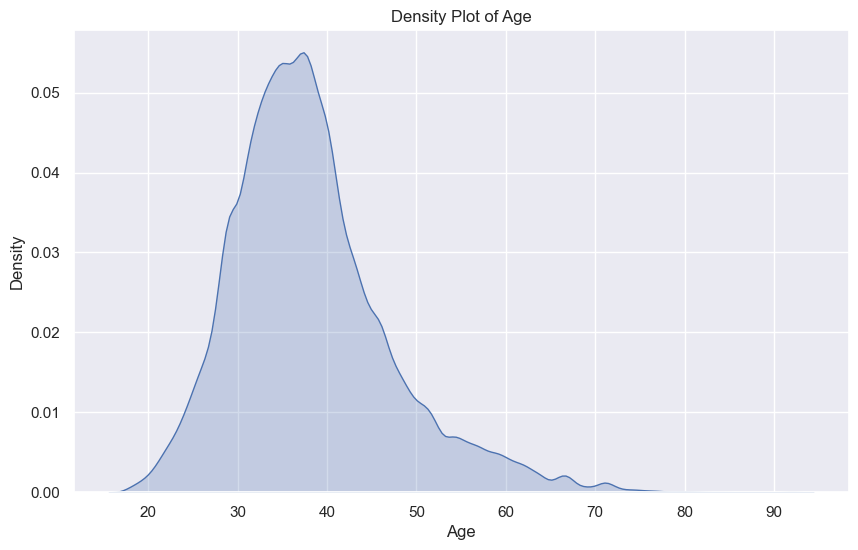

C:\Users\ilyas\AppData\Local\Temp\ipykernel_26872\1787145518.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


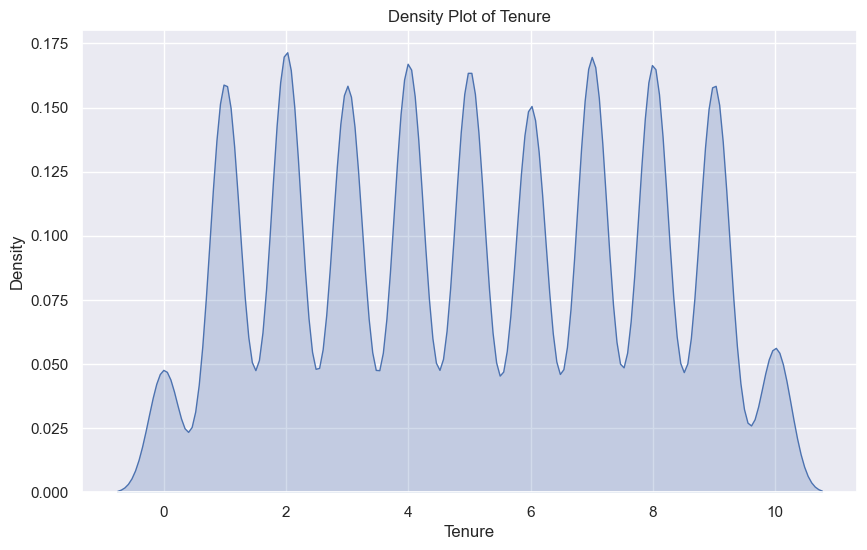

C:\Users\ilyas\AppData\Local\Temp\ipykernel_26872\1787145518.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


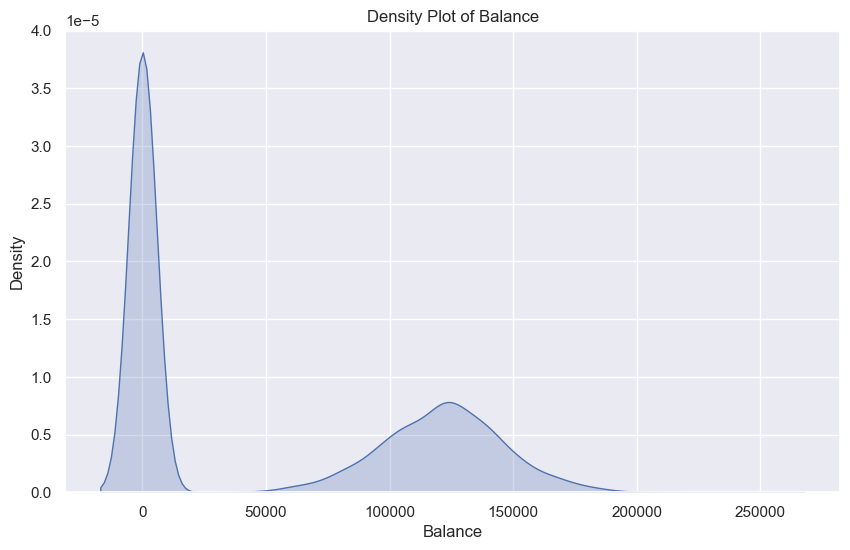

C:\Users\ilyas\AppData\Local\Temp\ipykernel_26872\1787145518.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


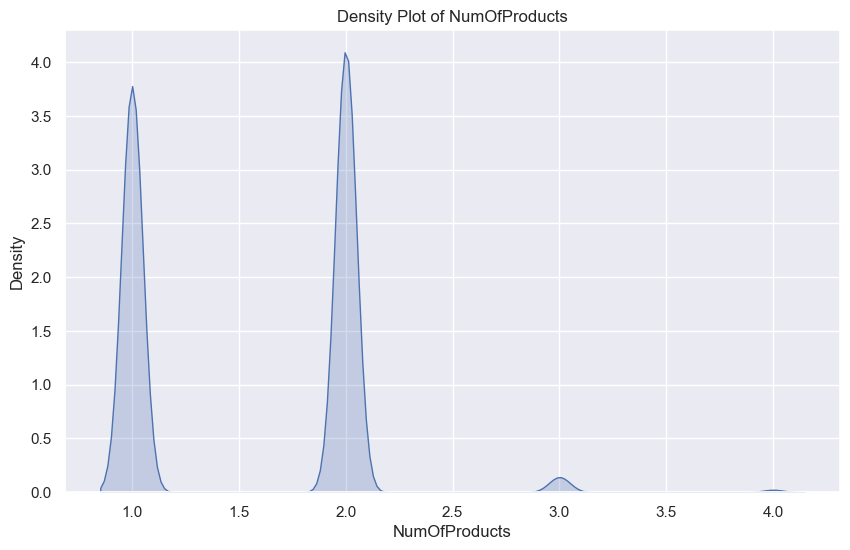

C:\Users\ilyas\AppData\Local\Temp\ipykernel_26872\1787145518.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


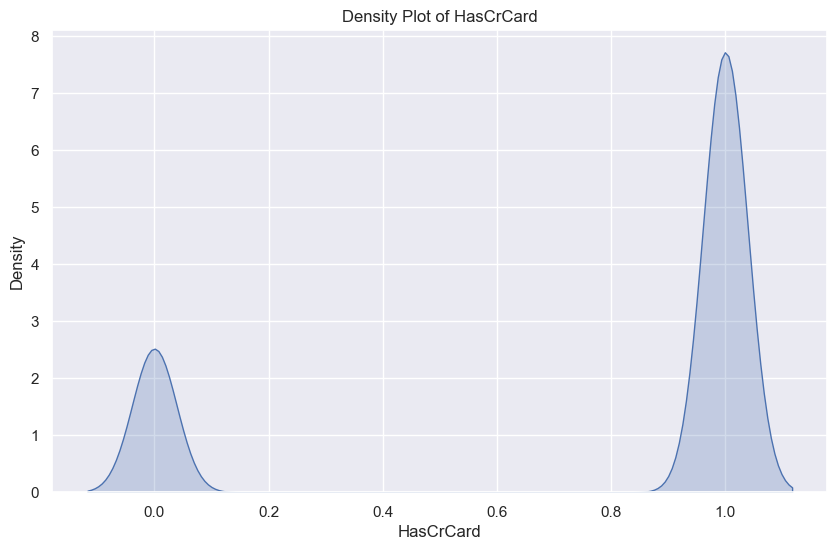

C:\Users\ilyas\AppData\Local\Temp\ipykernel_26872\1787145518.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


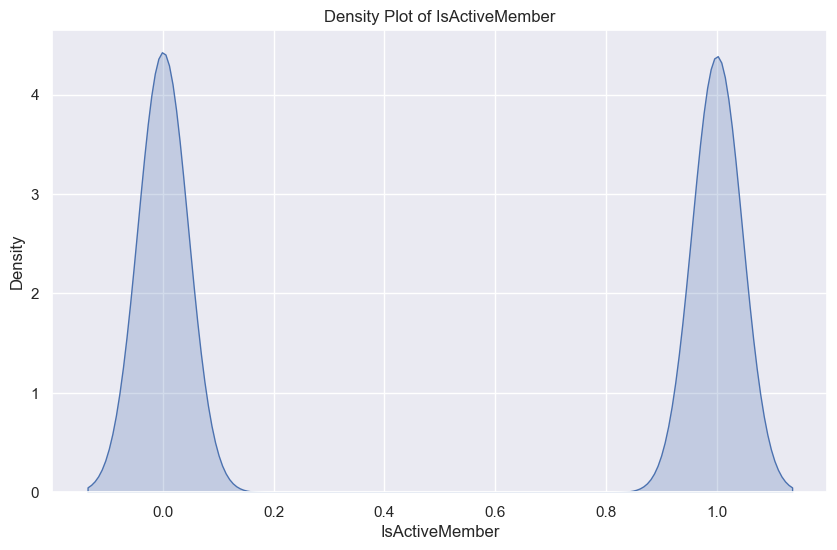

C:\Users\ilyas\AppData\Local\Temp\ipykernel_26872\1787145518.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


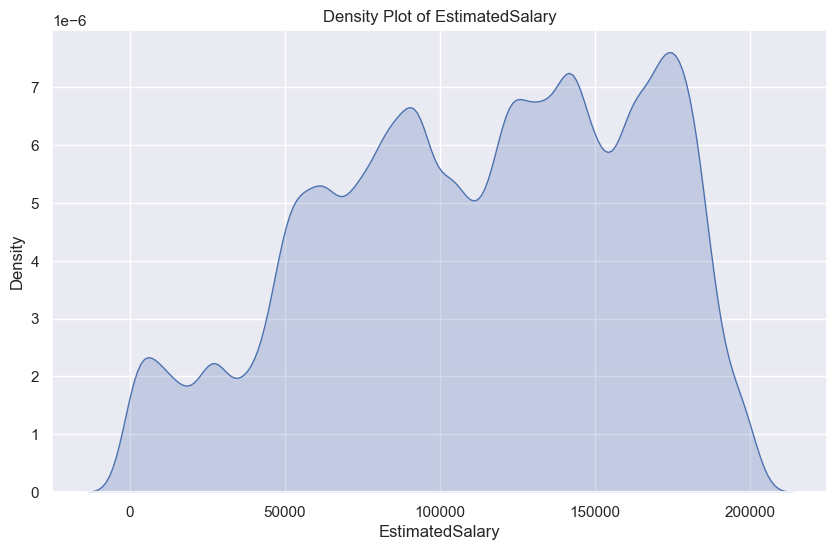

C:\Users\ilyas\AppData\Local\Temp\ipykernel_26872\1787145518.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[column], shade=True)


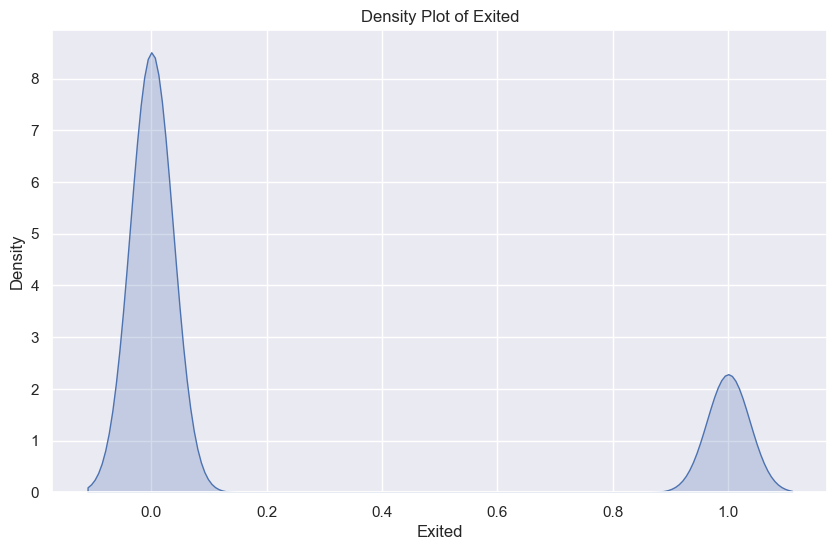

In [114]:
# Sayısal özellikler için yoğunluk grafikleri oluşturma
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df[column], shade=True)
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


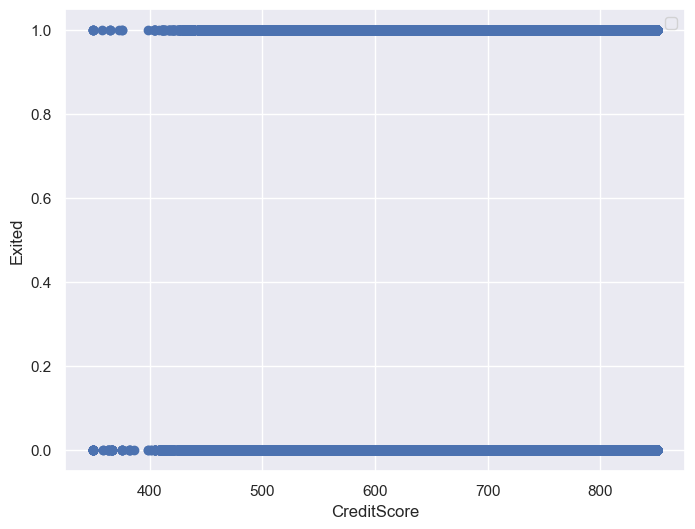

In [105]:
# Relationship between columns
plt.figure(figsize=(8, 6))

plt.scatter(df['CreditScore'], df['Exited'])

plt.xlabel('CreditScore')
plt.ylabel('Exited')
plt.legend()



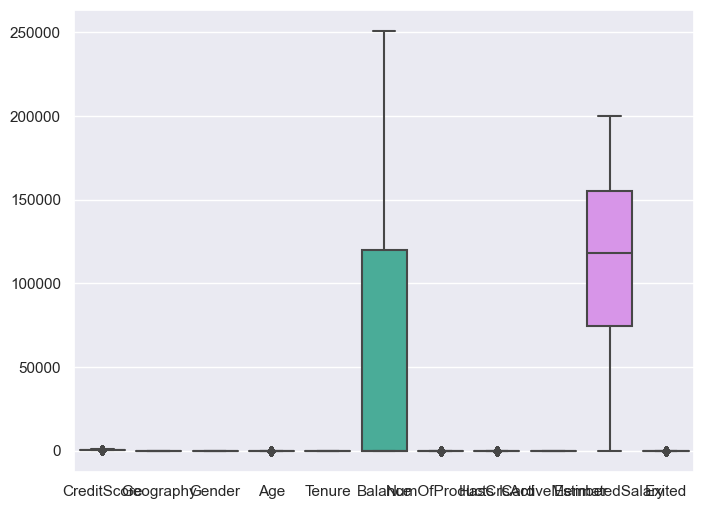

In [104]:
# Step 3: Plot the Boxplot
plt.figure(figsize=(8, 6))

sns.boxplot(data=df)
sns.set(rc={'figure.figsize':(11,10)})
plt.show()

### 7- Data Preperation

#### 7.1 Drop Unnecessary Columns 

In [96]:
# Original Data
df_org = df.copy()

In [97]:
# Drop unnecessary columns
df = df.drop(columns=['id','CustomerId','Surname'], axis=1)

#### 7.2 Encoding

In [98]:
# Label Encoding
labelencoder = LabelEncoder()

# Encoding 'Geography' column
df['Geography'] = labelencoder.fit_transform(df['Geography'])

# Encoding 'Gender' column
df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [99]:
df.head(1)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,668,0,1,33.0,3,0.0,2,1.0,0.0,181449.97,0


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CreditScore      165034 non-null  int64  
 1   Geography        165034 non-null  int32  
 2   Gender           165034 non-null  int32  
 3   Age              165034 non-null  float64
 4   Tenure           165034 non-null  int64  
 5   Balance          165034 non-null  float64
 6   NumOfProducts    165034 non-null  int64  
 7   HasCrCard        165034 non-null  float64
 8   IsActiveMember   165034 non-null  float64
 9   EstimatedSalary  165034 non-null  float64
 10  Exited           165034 non-null  int64  
dtypes: float64(5), int32(2), int64(4)
memory usage: 12.6 MB


### 8- Building Model-0

In [108]:
# Independent Features
X = df[['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']]

# Dependent Features
y = df['Exited']

# Logistic Regression modelini oluşturma ve eğitme
clf = LogisticRegression(solver="liblinear").fit(X, y)

In [109]:
# Modelin tahmin olasılıklarını hesaplama
y_pred_proba = clf.predict_proba(X)[:, 1]

# ROC AUC skorunu hesaplama
roc_score = roc_auc_score(y, y_pred_proba)
print(f"ROC AUC Score: {roc_score}")

ROC AUC Score: 0.7132962474501646
